# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 9</span>


### The Traveling Salesman Problem

The traveling salesman problem (TSP) consists of a salesman and a set of $N$ cities with positions $\vec{c}_i$. The salesman **has to visit each one of the cities starting from a certain one (e.g. the hometown) and returning to the same city**. The challenge of the problem is that the traveling salesman wants to **minimize the total length of the trip**.

Consider now the ordered sequence of cities, $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, which goes from city 1 to the n$^{th}$ city. The path that minimizes the following loss/cost function:

$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$

or 
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$


(with $\vec{x}_{N+1}=\vec{x}_1$) is one particular permutation, P, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

Note also that any particular permutation of the ordered sequence of cities can be obtained from the combination of many simple permutations among pairs of cities.

We can express a possible path via a 1D vector whose elements, from the first to the last, are integers that represents the cities in the order in which the salesman would visit them; for example for $N=5$ cities one possible path is represented by the vector:

$$
\left[ 1, 3, 5, 4, 2 \right]
$$

**Alteratively**, we can express a possible path also via a configuration of a $N\times N$ 2D *Ising-like* model with the following bonds:
1. any row must have one and at most one up spin
2. any column must have one and at most one up spin,

all the other spins are down.

We can represent such a configuration with a $N\times N$ matrix whose elements are 1 (spin up) or 0 (spin down); for example, in the case of a TSP with 5 cities:
$$
\begin{bmatrix}
1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1\\
0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0\\
0 & 0 & 1 & 0 & 0\\
\end{bmatrix}
$$

You can interpret this matrix in the following way:
- column index represents time of visit: first colum = first visit, etc.
- row index represents the ordered sequence of cities: first row = first city, etc.

the previous matrix thus refers to the following sequence:

$$
\vec{x}_1, \vec{x}_2, \vec{x}_3, \vec{x}_4, \vec{x}_5 = 
\vec{c}_{1}, \vec{c}_{3}, \vec{c}_{5}, \vec{c}_{4}, \vec{c}_{2}
$$

and thus to the following *cost* of the path:

$$
L^{(2)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3|^2 + |\vec{c}_3-\vec{c}_5|^2 + |\vec{c}_5-\vec{c}_4|^2 +
|\vec{c}_4-\vec{c}_2|^2 + |\vec{c}_2-\vec{c}_1|^2
$$

or
$$
L^{(1)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3| + |\vec{c}_3-\vec{c}_5| + |\vec{c}_5-\vec{c}_4| +
|\vec{c}_4-\vec{c}_2| + |\vec{c}_2-\vec{c}_1|
$$


Note that, for this *ising-like* representation any particular permutation of the ordered sequence of cities can be obtained by a sequence of multiple pair permutations among rows and/or among columns.

**<span style="color:red">Warm suggestion: by using the 1D representation</span>** (but you can work with the representation you prefer or the one you are able to invent) ...

### Exercise 09.1

Write a code to solve the TSP with a **Genetic** algorithm (GA). Note that you should invent **some** *genetic-mutation* operators and a *genetic-crossover* operator which should preserve the bonds of the problem: the salesman must visit one and only one time every city and must be back to the first city in the end of the path.

Once the data structure of your code is ready, before you start coding your genetic operators, I warmly suggest you to code the creation of the starting population and to code a **check function** that verifies if every *individual* fulfils the bonds. Then check your starting population ... and use your check function every time you create a new individual.

You have to invent also a **selection** operator. 
The fitness and thus the order of the population should be obtained from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Once your starting population has been ordered on a fitness basis,
you have 2 possibilities:
1. write a selection operator which obtain the probability to select an individual from $L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$ or $L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N)$. Mio: ma pari permuttion of consecutive cities only right?
2. write a selection operator which simply uses the order in the orderd population with $M$ individuals, e.g. select the individual $j$ with the algorithm: $j= int(M \times r^p)+1$ where $r$ is a uniform random number $r\in[0,1)$ and $p$ a convenient exponent. 

<span style="color:red">Set the first city to always appear at position 1, so as to reduce the degeneration of the shortest route to be 2, which corresponds to walking the shortest route in clockwise and anti-clockwise directions.</span>

Then you can start introducing some *genetic-mutation* operators, for example:
1. pair permutation of cities (except for the first city), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (At this point you should already have such operator ... how have you generated the starting population?).
2. shift of $+n$ positions for $m$ contiguous cities (except for the first city and $m \lt N-1$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a $+2$ shift of the second and third cities.
3. permutation among $m$ contiguous cities (except for the first city) with other (different!) $m$ contiguous cities ($m<N/2$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ for a permutation of the second and third cities with the last 2.
4. inversion of the order in which they appear in the path of $m$ cities (except for the first city and $m \le N$), e.g. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ for the inversion of the cities from 2 to 4.


Every mutation will have its probability, $p^{(i)}_m$ to be called and typically $p^{(i)}_m < 10\%$, but before to include crossover you can check if the GA is able to perform a good *random search* using only mutation operators (in this case $p^{(i)}$ could be higher than in the previous suggestion).

At this point you can add a *crossover* operator (that fulfils the bonds and that you will call with probability $p^{(i)}_c > 50\%$):

given a selected mother and father, e.g. 
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$
1. cut their paths at the same position:
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. conserve the first part of the paths:
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. complete the paths with the missing cities adding them in the **order** in which they appear in the consort:
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

Here you are: you have two sons that you can add to the new generation ... and so on!

Apply your code to the optimization of a path among 

- <span style="color:blue">34 cities randomly placed **on** a circumference</span>
- <span style="color:blue">34 cities randomly placed **inside** a square</span>

Show your results via:

- <span style="color:red">a picture of $L^{(2)}$ (or $L^{(1)}$) of the best path and of $\langle L^{(2)}\rangle$ (or $\langle L^{(1)}\rangle$), averaged on the best half of the population, as a function of the iterations/generations of your algorithm</span>
- <span style="color:red">a picture of the best path in cartesian coordinates</span>

# General approach to the problem

We want to "solve" the Travelling Salesman Problem (TSP), looking for good approximate solutions using a Genetic Algorithm (GA). The cities paths are parametrized by a vector of integers (Chromosomes made up of genes), which must satisfy the bonds of the problem. Numerically we approach the problem building a class Chromosome and a class Population which among it's data members will have a vector of Chromosome, representing the actual population. 

The GA tries to find the best path among the cities by simulating an evolutionary behaviour. To provide a good solution both aspects of diversifcation and intesification must be considered. The latter to focalise on the best solutions of each generation, and the former to provide ergodicity in the solutions space, in order to avoid being stucked in a local minima of the problem. Ergodicity is fundamental to find the best solution, while intensification allows to focus on the most promising Chromosomes.

The mutations operators provide a way to increasing ergodicity, as they allow to pass from a schema to another. The natural selection must lean towards the more fitted candidate in order to make the algorithm converge to a good solution. Instead the Crossover allows to have both intensification and diversification by mixing the genetic code of the parents.

We implemented the mutations operators and the crossover operator as suggested. And two selection operators.

One selection operator, as suggested, exctract candidate parents from an ordered population, according to fitness. This selection operator can be elitist at pleasure varying the input variable. A highly elitist algorithm will converge faster to it's solution but risks to not explore some parts of the solutions space.  

The second selection operator uses Simulated Annealing SA to select the candidate parents. Choosing from the best half of the population, the algorithm accepts or rejects the proposed parent, according to a Metropolis algorithm of the Boltzmann weight for the parent's fitness.

# Results

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys
matplotlib.rcParams['figure.figsize'] = [6, 6] # for square canvas

## Circle

As a first case we study the TSP on a circle, just to make sure the algorithm implemented works. We expect the distance of the path to be an approximation of the circle's circumference.

In [2]:
path="DATA/CIRCLE/"

In [3]:
fname="fit_circle.txt"

In [4]:
Ncity=34

ist_fit, av_fit, err_av_fit = np.loadtxt(path + fname, skiprows=1,  unpack=True)
x=np.arange(len(ist_fit))

In every run of the program the GA algorithm samples new gnerations' populations with the methods describe above. Here we plot, on the left the minimum distance found at each generation, while on the right the average distance over the best half of the population at each new generation.

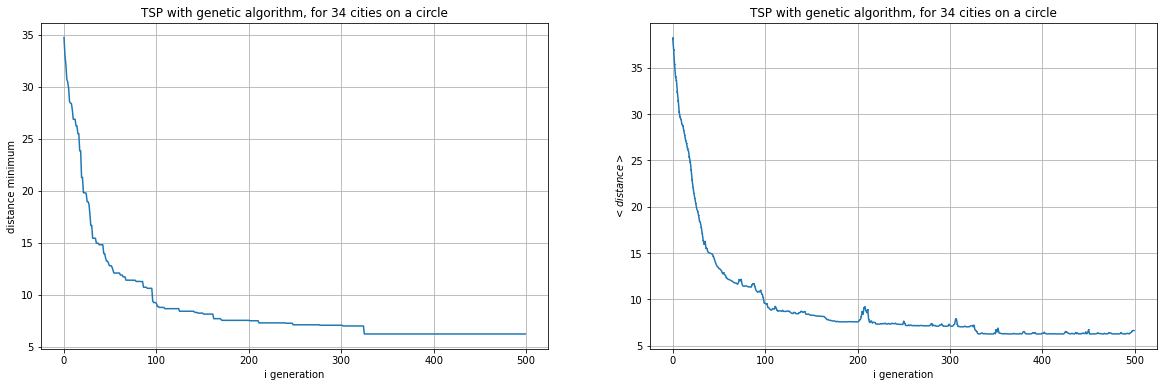

In [5]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 6))
    
ax1.plot(x, ist_fit)#, 
ax1.set_xlabel('i generation')
ax1.set_ylabel(f"distance minimum")
ax1.set_title(f"TSP with genetic algorithm, for {Ncity} cities on a circle")
ax1.grid(True)


ax2.errorbar(x, av_fit, yerr=err_av_fit)#, 
ax2.set_xlabel('i generation')
ax2.set_ylabel(f"$<distance>$")
ax2.set_title(f"TSP with genetic algorithm, for {Ncity} cities on a circle")
ax2.grid(True)


In [6]:
fname="CONFIG/Config_490.txt"

In [7]:
x , y =np.loadtxt(path + fname, unpack=True)

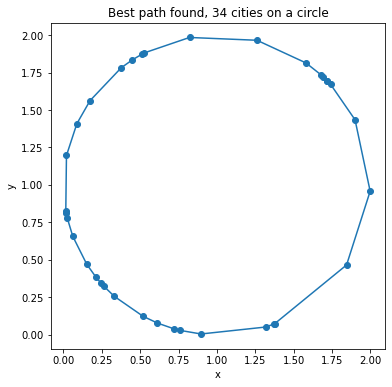

In [8]:

L=1
plt.scatter(x,y)
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Best path found, {Ncity} cities on a circle")
plt.show()

## Square

Having checked that the algorithm implemented works for cities distributed on a circle, we now continue the analysis for cities distributed inside a square.

In [9]:
path="DATA/SQUARE/"

In [10]:
fname="fit_square.txt"

In [11]:
Ncity=34
L=1

ist_fit, av_fit= np.loadtxt(path + fname, skiprows=1,  unpack=True)
x=np.arange(len(ist_fit))


As before, on the left we plot the minimum distance found at each generation, while on the right there is the average distance over the best half of the population at each new generation.

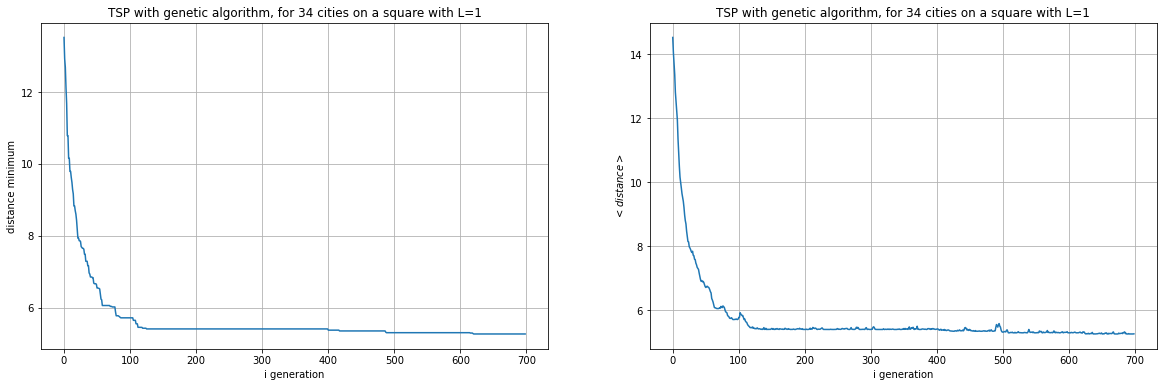

In [12]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 6))
    
ax1.plot(x, ist_fit) 
ax1.set_xlabel('i generation')
ax1.set_ylabel(f"distance minimum")
ax1.set_title(f"TSP with genetic algorithm, for {Ncity} cities on a square with L={L}")
ax1.grid(True)


ax2.plot(x, av_fit)
ax2.set_xlabel('i generation')
ax2.set_ylabel(f"$<distance>$")
ax2.set_title(f"TSP with genetic algorithm, for {Ncity} cities on a square with L={L}")
ax2.grid(True)


In [13]:
config_file=len(ist_fit)-9
fname="CONFIG/Config_"+str(config_file)+".txt"
print(fname)

CONFIG/Config_690.txt


In [14]:
x , y =np.loadtxt(path + fname, unpack=True)

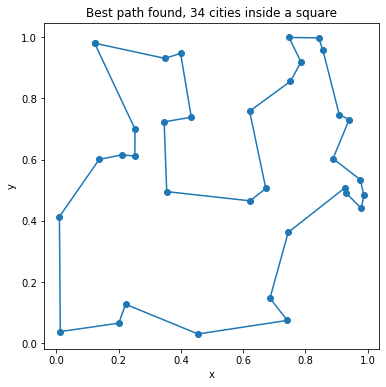

In [15]:
L=1
plt.scatter(x,y)
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.title(f"Best path found, {Ncity} cities inside a square")
plt.show()

# Analysis on bounds for the expectation value of minimum distance among cities in a square

We know want to use our algorithm to make an estimation of the expectation value for the minimum distance of  N random points in a square of length 1, $E[d_{min}]$. The wikipedia article for the Travelling salesman problem provides some already existing results, there are both a theoretical and numerical lower bound for the expactation value. We don't expect to be able to reproduce these results, since for instance in our code there isn't a focus on solving the TSP for really large number of cities. Nevertheless these results can be usefull as a reference. 

https://en.wikipedia.org/wiki/Travelling_salesman_problem#Path_length_for_random_sets_of_points_in_a_square

To obatin estimates of $E[d_{min}]$ we need to run the program with different random generators from previous runs, in order to have statistical indipendent configurations of the cities coordinates and difference seqeunces of pseduo random numbers for the popolation evolution. The program in fact expects, among other parameters, two integers, that will the determine the rows from which the Random objects (random.cpp) will take the primes numbers in order set up the seed and the random generator.

As a first case we simply work on 34 cities. We performed 30 different runs to obtain the estimates. Here there are the already existing results.

In [16]:
#theoretical lower bound
n=34
L_teo_bound=(5/8+19/5184.)*n**(0.5)
L_exp_bound=0.7078*n**(0.5)+0.551
print("theoretical bound :", L_teo_bound)#theoretical
print("numerical bound : " ,L_exp_bound)#numerical

theoretical bound : 3.6657160928435255
numerical bound :  4.678147751171504


Here there are our results using the standard selection operator which works on a fitness-ordered population

In [17]:
path="DATA/BOUND/"
fname="bound_fit.txt"

In [27]:
x =np.loadtxt(path + fname)
mean=np.average(x)
err_mean=(np.var(x)/len(x))**0.5
print("standard selection operator", mean, err_mean)
# selection 2 result 


standard selection operator 6.2419220000000015 0.1975395100825655


Here there are the results obtained with the selection operator that imitates a Simulated annealing algorithm.

In [19]:
path="DATA/BOUND/"
fname="bound_fit_sa.txt"

In [28]:
x =np.loadtxt(path + fname)
mean=np.average(x)
err_mean=(np.var(x)/len(x))**0.5
print("SA selection operator", mean, err_mean)
# selection1 (SA method) result

SA selection operator 6.2419220000000015 0.1975395100825655


## Varying the number of cities

Now we do the same study but varying the number of cities from 10 to 100. Every estimation of $E[d_{min}]$ is obtained with 10 runs. So now we prepare the input file. We must have as input parameters the two integers for the random generators as explained before, the number of cities, and the length of the suqare's side, which will be always one.

In [21]:
#preparing the input file ------> if you want to confront with MPI result maybe you can do again this plot but with more than 
City_vec=np.linspace(10, 100, 10, int)
Nsim=10;
L=1
method="SA"
#https://numpy.org/doc/stable/reference/random/generator.html
rng = np.random.default_rng(1234)

with open('input_fixedL.dat', 'w') as f:

    for i in City_vec :
        for j in range(Nsim) :
            print(rng.integers(1,30000),rng.integers(1,30000), i, L, 2, file=f)# 2 is for standard selection operator
            
with open('input_fixedL_SA.dat', 'w') as f:

    for i in City_vec :
        for j in range(Nsim) :
            print(rng.integers(1,30000),rng.integers(1,30000), i, L, 1, file=f)# 1 is for SA operator            

In [22]:
path="DATA/BOUND/"
fname="bound_fixedL.txt"
fname2="bound_fixedL_SA.txt"

In [23]:
#my results

#standard slection operator
output=np.loadtxt(path + fname)
values=[output[i*Nsim:(i+1)*Nsim] for i in range(Nsim)]#minimum distance value of each run
averages=[np.mean(values[i]) for i in range(Nsim)]
errors=[(np.var(values[i])/Nsim)**(0.5) for i in range(Nsim)]

#SA selection operator results
output2=np.loadtxt(path + fname2)
values2=[output2[i*Nsim:(i+1)*Nsim] for i in range(Nsim)]#minimum distance value of each run
averages2=[np.mean(values2[i]) for i in range(Nsim)]
errors2=[(np.var(values2[i])/Nsim)**(0.5) for i in range(Nsim)]

In [24]:
exp_bounds=[0.7078*n**(0.5)+0.551 for n in City_vec]
teo_bounds=[(5/8+19/5184.)*n**(0.5) for n in City_vec]

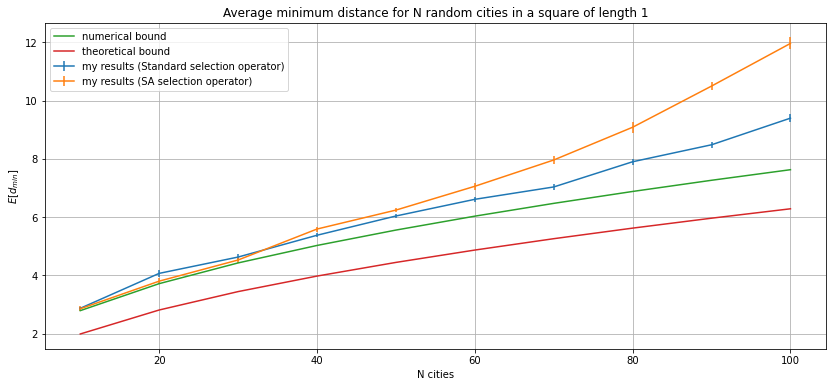

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
ax.errorbar(City_vec, averages, yerr=errors , label="my results (Standard selection operator)")
ax.errorbar(City_vec, averages2, yerr=errors2 , label="my results (SA selection operator)")
ax.plot(City_vec, exp_bounds, label="numerical bound")
ax.plot(City_vec, teo_bounds, label="theoretical bound")
ax.set_xlabel("N cities")
ax.set_ylabel(r"$E[d_{min}]$")
ax.set_title(f"Average minimum distance for N random cities in a square of length 1")
ax.legend()
ax.grid()